# Dice Roll Sums Part 2

## 1 Review of Dice Rolls Part 1

In the last homework assignment, you learned about the probability distribution of the "dice roll --> sum" random variable. You constructed this distribution with the following steps.
 1. Created all 36 dice roll outcomes (the domain of the random variable)
 2. Created a dictionary that mapped from dice roll outcomes to sums of each outcome (the random variable)
 3. Created a grouping of sums. _For each sum, counting all outcomes that map to that sum._
 4. Created a probability distribution of the random variable.
 5. Graphed the probability distribution.

You should be able to do this sort of thing for the midterm. You should be able to do it without using the Python Standard Library. You should also know about the Python Standard Library and how it could help you to achieve these.

## 2 Coding Review Dice Rolls Part 1

Below, I will write some code to recreate the last assignment using the standard libraries.

#### 2.1 Random Variable Reconstruction

In [1]:
import json # this module allows me to print out dictionaries 
import itertools
import collections

import matplotlib.pyplot as plt

# Step 1: Create Dice Roll Outcomes
dice_roll_outcomes = list(itertools.product(range(1,7), repeat=2))

# Step 2: Create Random Variable as a Dictionary
outcome_to_sum_map = dict()
for outcome in dice_roll_outcomes:
    outcome_to_sum_map[outcome] = sum(outcome)
print("Random Variable:", outcome_to_sum_map, end='\n\n')

Random Variable: {(1, 1): 2, (1, 2): 3, (1, 3): 4, (1, 4): 5, (1, 5): 6, (1, 6): 7, (2, 1): 3, (2, 2): 4, (2, 3): 5, (2, 4): 6, (2, 5): 7, (2, 6): 8, (3, 1): 4, (3, 2): 5, (3, 3): 6, (3, 4): 7, (3, 5): 8, (3, 6): 9, (4, 1): 5, (4, 2): 6, (4, 3): 7, (4, 4): 8, (4, 5): 9, (4, 6): 10, (5, 1): 6, (5, 2): 7, (5, 3): 8, (5, 4): 9, (5, 5): 10, (5, 6): 11, (6, 1): 7, (6, 2): 8, (6, 3): 9, (6, 4): 10, (6, 5): 11, (6, 6): 12}



In [2]:
# Step 3: Create the grouping of sums.
sum_to_num_outcomes_map = dict(collections.Counter(outcome_to_sum_map.values()))
print("Counts of each output of the random variable", sum_to_num_outcomes_map, end='\n\n')

Counts of each output of the random variable {2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}



In [3]:
# Step 4: Create the grouping 
sample_space_size = len(outcome_to_sum_map)
sum_to_probability_map = dict()
for sum_, num_outcomes in sum_to_num_outcomes_map.items():
    sum_to_probability_map[sum_] = num_outcomes/sample_space_size
print("Probability Distribution of Random Variable", json.dumps(sum_to_probability_map, indent=4), sep='\n')

Probability Distribution of Random Variable
{
    "2": 0.027777777777777776,
    "3": 0.05555555555555555,
    "4": 0.08333333333333333,
    "5": 0.1111111111111111,
    "6": 0.1388888888888889,
    "7": 0.16666666666666666,
    "8": 0.1388888888888889,
    "9": 0.1111111111111111,
    "10": 0.08333333333333333,
    "11": 0.05555555555555555,
    "12": 0.027777777777777776
}


#### 2.2 Graphing the Probability distribution of a Random Variable

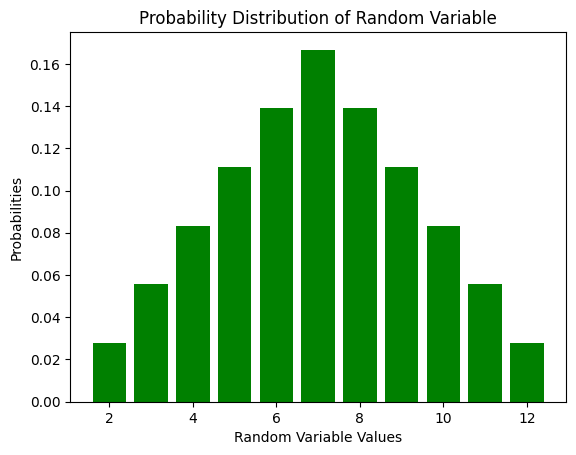

In [4]:
# Step 5
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(sum_to_probability_map.keys(), sum_to_probability_map.values(), color='g')
ax.set_title("Probability Distribution of Random Variable")
ax.set_xlabel("Random Variable Values")
ax.set_ylabel("Probabilities")
plt.show()

## 3 The expectation of a random variable

Well, now that you have a probability distribution of this random variable, you can compute its expectation.

**3.1 Markdown Exercise** 

What is the meaning of the _expectation_ of a random variable? What is the best way to interpret this word when you hear it? Be precise with your language?

**3.1 Markdown Answer** 

The expectation of a random variable can be thought of as the long-running average of values. For example, in the long run, when rolling dice and computing sums, the average will become arbitrarily close to 7. So if you rolled dice a trillion times and computed the average sum the answer would be between 6.999 and 7.001.

We can answer this question because we saw it was 7 when we were in class last.

**3.2 Coding Exercise** 

Compute the expected value of a dice roll.

In [5]:
# 3.2 Coding Answer
weighted_average_of_sums = 0
for sum_, probability in sum_to_probability_map.items():
    weighted_average_of_sums += sum_ * probability
print("The expectation of the sum of a dice roll is:", weighted_average_of_sums)

The expectation of the sum of a dice roll is: 6.999999999999999


## 4 Let's simulate some dice rolls

**4.1 Coding Exercise**

Use the `random` module to create a list of dice 10,000 dice rolls named `random_outcomes`.

In [6]:
# 4.1 Coding Answer 
import random
random_outcomes = random.choices(dice_roll_outcomes, k=1000)

**4.2 Coding Exercise** 

Create a corresponding list of sums, `random_sums`. It should be the case that the sum of the outcome `random_outcomes[i]` is `random_sums[i]`. For example, in the list `[(2,3), (1,3), (1,2), (5,6)]` you would create a list named `random_sums` which looks like `[5, 4, 3, 11]`.

In [7]:
# 4.2 Coding Answer
random_sums = []
for outcome in random_outcomes:
    random_sums.append(sum(outcome))

**4.3 Coding Exercise** 

Now create a dictionary `sum_counter` which maps each sum to the number of times it appeared. Do not use `collections.Counter` to create this counter.

In [8]:
# 4.3 Coding Answer
sum_counter = {}
for sum_ in random_sums:
    if sum_ not in sum_counter:
        sum_counter[sum_] = 0
    sum_counter[sum_] += 1
sum_counter

{6: 158,
 2: 30,
 7: 156,
 10: 91,
 11: 54,
 4: 84,
 5: 112,
 8: 149,
 3: 38,
 9: 95,
 12: 33}

## 5 Graphing the Empirical Distribution

The above counter is called the _empirical distribution_ of dice rolls. Toward the top of this notebook, you'll see a green probability distribution of dice rolls. Let's graph it.

**5.1 Coding Exercise** 

Evaluate the following: `_ = plt.bar(sum_counter.keys(), sum_counter.values())`

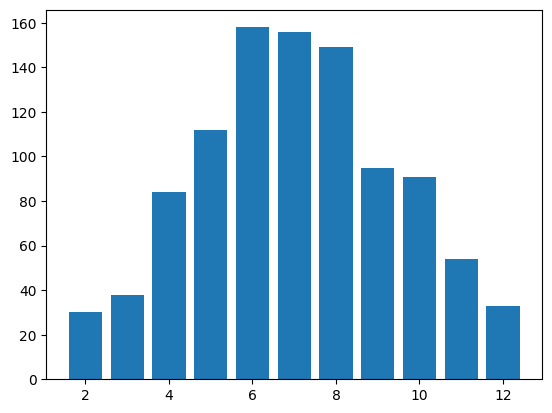

In [9]:
# 5.1 Coding Answer
_ = plt.bar(sum_counter.keys(), sum_counter.values())

**5.2 Markdown Exercise** 

What is that graph called that you just created?

**5.2 Markdown Answer** 

This graph is called a histogram and it captures the empirical distribution of sums of dice rolls. In other words, it is charting out the number of items in `random_sums` of each distinct sum. It is answer questions such as, "How many 2's are in in `random_sums`?"

**5.3 Coding Exercise** 

Evaluate the following: `_ = plt.hist(random_sums, bins=range(2,14))`.

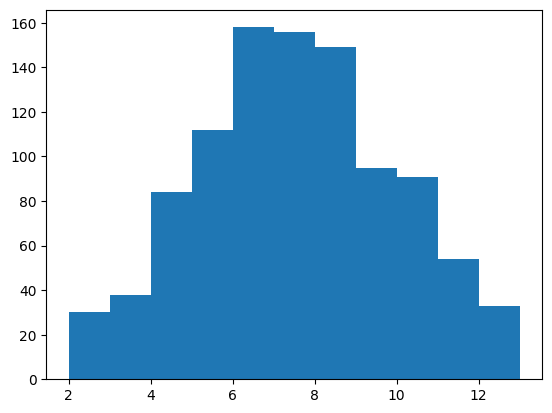

In [10]:
# 5.3 Coding Answer
_ = plt.hist(random_sums, bins=range(2,14))

**5.4 Markdown Exercise** 

Explain why this graph is exactly like the above graph. Yes, it's without spaces between the vertical bars but the height of the bars, numbers and axes labels are exactly the same. Why?

**5.4 Markdown Answer**

Well, both graphs are histogram representations of the items in `random_sums`. A histogram is a common way to evaluate a univariate distribution of data. For example, you could be looking at number of hours of screentime per week for a person, week over week. Or you could be looking at the infant mortality rate per hospital across every hospital in the nation to try to get a feel for how the rate is distributed.  As a result, the histogram is a built in function.

**5.5 Coding Exercise** 

Graph the empirical distribution of fetal heart rates from the csv file in this assignment folder called `fetal_health.csv`. Read about the file [here](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification), it may help you to answer the question.

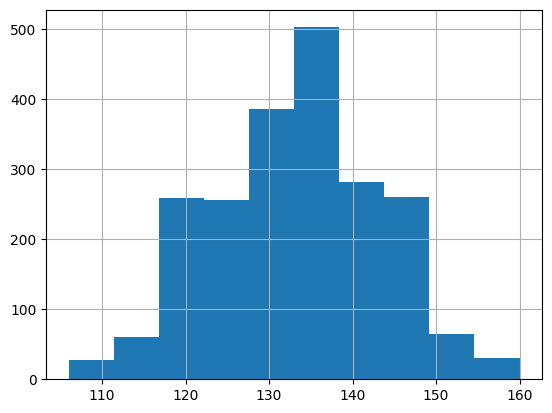

In [11]:
#5.5 Coding Answer
import pandas as pd
df = pd.read_csv('fetal_health.csv')
_ = df['baseline value'].hist()

**5.6 Coding Exercise** 

Create a graph visualizing the empirical distribution of fetal health.

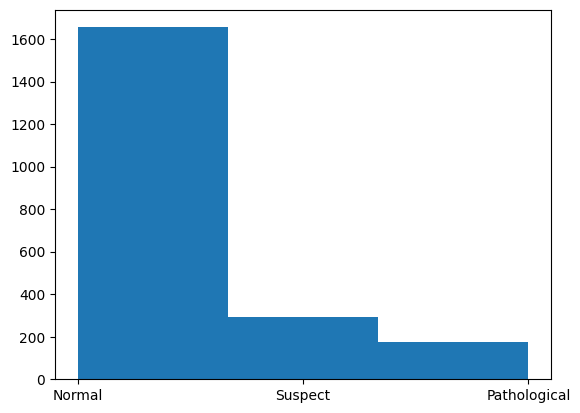

In [12]:
# 5.6 Coding Answer
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(df.fetal_health, bins=3, )
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(['Normal', 'Suspect', 'Pathological'])

**5.7 Coding Exercise**

What proportion of fetuses were classified as not "Normal"? Use the built-in `round` function to round your result to the nearest 4 decimal points. Look it up for yourself. Hopefully you can find [this page](https://docs.python.org/3/library/functions.html#round) by searching online appropriately.

In [13]:
# 5.7 Coding Answer
result = (len(df) - sum(df.fetal_health == 1))/len(df)
round(result, 4)

0.2215

### 6 Additional Observations 

**6.1 Markdown Exercise** 

Read this and write more than one sentence on what you learned: https://quickmathintuitions.org/random-variables-why-are-they-needed/

**6.1 Markdown Answer**

I assume each student learned something different. Hopefully we are starting to get a feeling for what a random variable is and precisely what the concept of its distribution is. So far we have only been looking at discrete distributions because all the sample spaces we've looked at have been finite.

**6.2 Markdown Exercise**

Above, you created the empirical distribution of sums of dice rolls. What do you notice about the shape of this distribution compared to the probability distribution of sums of dice rolls? Why are you noticing this? Is it a coincidence?

**6.2 Markdown Answer**

It is a similar shape. This makes sense because the proportion of each outcome sum is dictated by the probability distribution, and so, as we increase the number of sums, the shape of the empirical distribution tends to "converge" to the shape of the probability distribution.

**6.3 Coding Exercise** (This sort of question is fair game for the midterm.)

Create a function `graph_empirical_probability_distribution` that takes exactly one keyword argument `num_rolls=100`, so that when this function is called it will do the following behind the scenes: 
  1. create a random sample of `num_rolls` dice rolls
  2. create a list of corresponding sums, and 
  3. graph the _empirical probability distribution_ of the sums

In [14]:
# 6.3 Coding Answer
def graph_empirical_probability_distribution(num_rolls=100):
    random_outcomes = random.choices(dice_roll_outcomes, k=num_rolls)
    random_sums = [sum(outcome) for outcome in random_outcomes]
    sums_to_num_outcomes = collections.Counter(random_sums)
    sums_to_sample_proportions = {sum_:n_outcomes/num_rolls for sum_,n_outcomes in sums_to_num_outcomes.items()}
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.bar(sums_to_sample_proportions.keys(), sums_to_sample_proportions.values())
    ax.set_title('empirical probability distribution of dice roll sums')
    ax.set_xlabel('empirical sums')
    ax.set_ylabel('empirical proportions')

**6.4 Coding Exercise**

Evaluate, by pressing `ctrl` and `Return` the function multiple times in a row to see how the distribution changes in less extreme ways the higher num_rolls. Start with `num_rolls=50`, then try `100`, then `1000`, and finally `20000`.

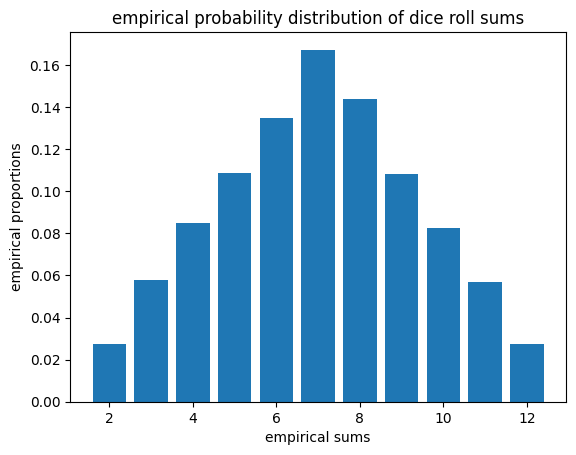

In [15]:
# 6.4 Coding Answer

graph_empirical_probability_distribution(num_rolls=20000)

**6.5 Markdown Exercise**

Try to explain what you see happening in the above exercise, visually, with respects to the bars, both if you keep `num_rolls` the same and as you start to increase or decrease `num_rolls`.

**6.5 Markdown Answer**

As the number of dice outcomes increase, the emerging empirical distributions tend to look like the probability distribution of the random variable, they also seem to sort of stabilize rather than swinging more wildly like they do  

**6.6 Coding Exercise**

Create a function `get_new_sample_mean` with keyword argument `num_rolls=1000` that generates a random sample of sums and computes the average.

In [16]:
# 6.6 Coding Answer
def get_new_sample_mean(num_rolls=100):
    random_sums = [sum(outcome) for outcome in random.choices(dice_roll_outcomes, k=num_rolls)]
    mean = sum(random_sums)/len(random_sums)
    return mean

**6.7 Coding Exercise**

Use `get_new_sample_mean` to print out 50 sample means sorted from least to greatest where the number of rolls was 1000 that generated each sample mean.

In [17]:
# 6.7 Coding Exercise

sample_means = []
for _ in range(50):
    sample_means.append(get_new_sample_mean(num_rolls=1000))
print(sorted(sample_means))

[6.818, 6.86, 6.87, 6.874, 6.875, 6.892, 6.901, 6.929, 6.93, 6.94, 6.945, 6.953, 6.957, 6.958, 6.962, 6.979, 6.984, 6.987, 6.992, 6.994, 6.996, 7.003, 7.008, 7.01, 7.014, 7.014, 7.023, 7.027, 7.03, 7.034, 7.039, 7.039, 7.045, 7.055, 7.062, 7.063, 7.064, 7.069, 7.072, 7.075, 7.083, 7.086, 7.09, 7.103, 7.105, 7.134, 7.149, 7.154, 7.168, 7.281]


**6.8 Markdown Exercise**

Notice how the sample means are close in value to the expectation of the sum random variable that you computed in exercise 3.2. That value was 7. Is this surprising to you? In statistics your job is to start to connect the dots backwards. You will never know the "7" in statistics. You will not know the list of 50 sample means of 1000 dice rolls. You will literally know only one of the sample means and sample empirical distributions. The whole point of the past 5 weeks of class was to firm up your understanding of probability and to introduce you to programming in Python. After the midterm, we will begin our work in data analysis and running statistics on said data. I am hoping you really spend time soaking in this paragraph. For this exercise try to restate and reflect on what is written in this paragraph.

**6.9 Markdown Answer**

I, Steven, just did this in my own words. There is no right answer here. I want to see that you have digested this material in your answer.